# 在Keras中使用圖像增強來進行深度學習
原文: [Image Augmentation for Deep Learning With Keras](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

作者: Jason Brownlee

中譯: Erhwen Kuo (erhwenkuo@gmail.com)

使用神經網絡和深度學習模型時需要準備數據。對於複雜的圖像對象物件識別的任務，也需要越來越多的數據增強功能。

在這篇文章中，您將了解使用Keras開發深度學習模型時，如何使用數據準備和數據增強來讓您的模型的效能更好。

## Keras圖像增強API


Keras的圖像增強(image augmentation) API簡單而強大。


Keras提供ImageDataGenerator類別，用於定義圖像數據準備和增強的配置。這包括以下功能：
* Sample-wise 圖像像素標準化
* Feature-wise 圖像像素標準化
* ZCA 白化轉換
* 圖像隨機旋轉，移動和翻轉
* 圖像張量維度的重排序
* 儲存增強圖像數據

增強圖像生成器可以創建如下：

    datagen = ImageDataGenerator()
    
Keras並不是在記憶體中對整個圖像數據集執行圖像轉換操作，而是設計為通過深度學習模型訓練過程進行迭代，從而為您動態地創建增強的圖像數據。這會減少您的記憶體開銷，但在模型訓練期間會增加一些額外的時間成本。

創建並配置好**ImageDataGenerator**之後，您必須用您的數據來訓練它。這個步驟將計算實際執行轉換到您的圖像數據所需的任何統計參數。您可以通過調用數據生成器上的**fit( )**函數並將傳遞您的訓練數據集來完成這個前置動作。

    datagen.fit(train)
    
數據生成器本身實際上是一個迭代器，當被呼叫時返回一個批量的圖像資料。我們可以通過調用**flow( )**函數來配置批量大小並並獲取批量的圖像資料。
    
    X_batch, y_batch = datagen.flow(train, train, batch_size=32)

最後我們就可以使用數據生成器。我們不必調用我們模型的**fit( )**函數，而是調用**fit_generator( )**函數，並傳遞數據生成器的實例(instance)和每個循環的步數(steps_per_epoch)以及要訓練的循環總數(epochs)。

    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=nb_epoch)
                        
您可以在Keras文檔中了解關於Keras[圖像數據生成器API](http://keras.io/preprocessing/image/)更多信息。

## 圖像增強(Image Augmentation)相關參數的比較

現在您已經知道Keras中的圖像增強API是如何工作的，我們來看一些例子。

這些例子中我們將使用MNIST手寫數字識別的圖像集。首先，讓我們看看訓練數據集中的前9個圖像。

Using TensorFlow backend.


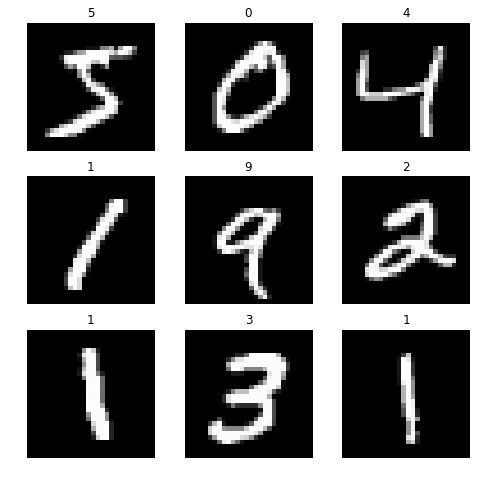

In [1]:
import keras
# Plot images
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小

# 產生一個3x3網格的組合圖像
for i in range(0, 9):
    plt.subplot(330+1+i) # (331) -> 第一個子圖像, (332) -> 第二個子圖像
    plt.title(y_train[i])
    plt.axis('off')     #不顯示坐標
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray')) # 以灰階的圖像顯示
    
# 展現出圖像
plt.show()

運行這個例子會提供了以上的圖片，我們可以用它來比較下面例子中的圖片準備(image preparation)和增強(augmentation)。

## 影像特徵標準化 (Feature Standardization)

我們可以把整個數據集中的每個像素值來進行標準化(standardize pixel)。這被稱為特徵標準化，你可以想像影像特徵標準化的程序如同我們對一般表格數據集中每個列會進次的資料標準化。

您可以通過在ImageDataGenerator類別上設置featurewise_center和featurewise_std_normalization的參數來執行影像特徵標準化。

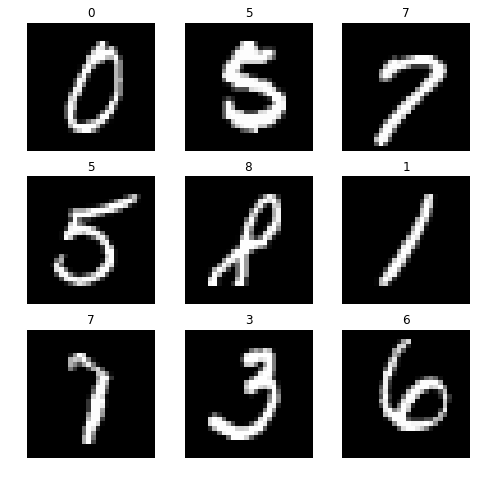

In [2]:
# 對整個資料集進行"影像特徵標準化" , mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 在keras的backend預設使用tensorflow
# 而tensorflow在處理圖像是的資料結構是3維的張量 (圖像寬:width, 圖像高:height, 圖像頻道:channel)

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

## ZCA 白化轉換 (ZCA Whitening)

圖像的白化變換是為了減少圖像像素矩陣中的冗餘/去除相關性(共線性)的線性特徵所進行的代數運算轉換。

進行圖像中像素矩陣去除相關性的轉換是為了更好地突顯圖像中的結構和特徵到學習演算法。

這個轉換的概念在以前大多是使用主成分分析（PCA）技術來執行圖像白化。最近，ZCA的技術顯示了更好的結果，對圖像進行ZCA轉換後的圖像可以保留原始尺寸的大小，從而使轉換後的圖像仍然看起來像原始圖像(這一點與PCA是不同的)。

您可以通過將zca_whitening參數設置為True來執行ZCA白化轉換。

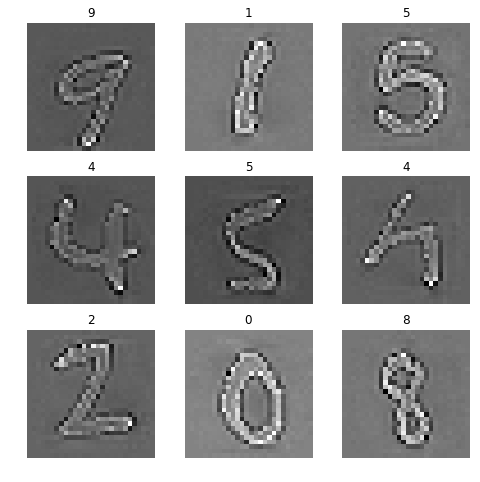

In [3]:
# ZCA 白化轉換 (ZCA Whitening)
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
datagen = ImageDataGenerator(zca_whitening=True)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

運行以上範例，您可以在圖像中看到相同的一般數字結構以及每個數字的輪廓如何被突顯。

## 隨機旋轉 (Random Rotations)

有時您的樣本數據中的圖像可能在場景中會有不同的旋轉的角度。

在訓練您的模型時，妳可以透過隨機旋轉訓練數據集裡的圖像來產生一些新的訓練圖像來幫助您的模型可以更好地處理圖像的旋轉問題。

下面的範例通過設置rotation_range參數來創建更多的MNIST數字圖像(隨機旋轉最多可達90度)。

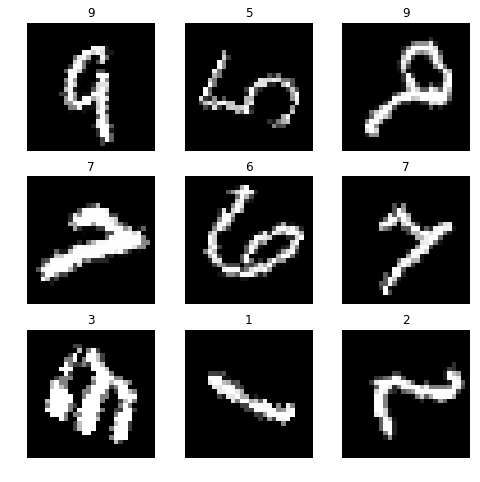

In [4]:
# 隨機旋轉 (Random Rotations)
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
datagen = ImageDataGenerator(rotation_range=90)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

運行以上範例，您可以看到圖像已左右旋轉至90度的極限。這個"隨機旋轉"的功能對解決MNIST數字辨識這個問題沒有什麼幫助，因為MNIST數字有一個標準化的方向，但是當您要辨識的對象或物件需要不同方向的照片來進行訓練學習時，這種轉換可能有相當的幫助。

## 隨機偏移 (Random Shifts)

圖像中的對象或物件在圖框中的位置可能在最中間。他們可能以各種不同的方式偏離圖框的中心點。

您可以訓練您的深度學習網絡，通過人工創建您的訓練數據的偏移圖像來讓您的模型能夠辨識和處理偏離中心的對象或物件。 Keras的"圖像數據增強產生器(ImageDataGenerator)"支持通過width_shift_range和height_shift_range兩個參數設定來對訓練數據進行水平和垂直隨機轉換來產生新圖像數據。

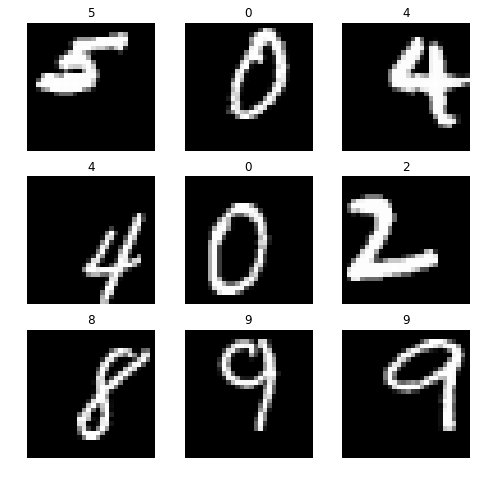

In [5]:
# 隨機偏移 (Random Shifts)
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

運行此範例將創建新的MNIST數字圖像的位移版本。同樣的，這對於MNIST來說不是必須的，因為手寫數字已經居中，但是你可以看到這對於更複雜的圖像問題來說可能是有用的。

## 隨機鏡像翻轉 (Random Flips)

另一個可以提高大型複雜圖像問題辨識性能的圖像增強法，是在您的圖像訓練數據中利用圖像隨機翻轉來產生新的圖像數據。

Keras的"圖像數據增強產生器(ImageDataGenerator)"支持使用vertical_flip和horizontal_flip兩個參數設定來對訓練數據進行垂直和水平軸隨機翻轉來產生新圖像數據。



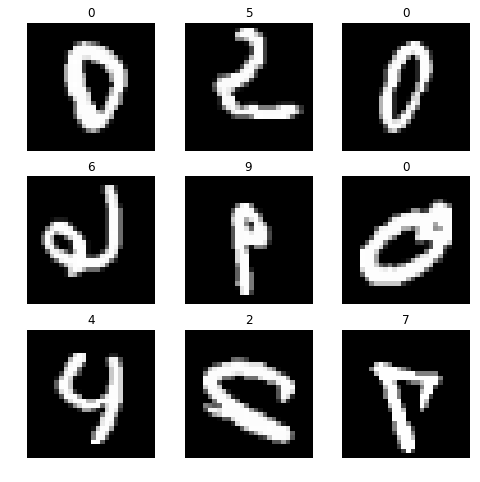

In [6]:
# 隨機鏡像翻轉 (Random Flips)
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

運行這個範例，您可以看到翻轉的數字。翻轉數字對於MNIST來說是沒有用的，因為它們總是具有正確的左右方向，但是這對於可能具有不同方向的場景中的對象的照片的問題可能是有用的。

## 儲存增強的圖像數據　(Saving Augmented Images to File)

數據準備和增強由Keras在模型訓練的運行中進行。

這對記憶體的使用效率很高，但是您有可能需要在訓練期間使用在檔案系統中圖像檔。例如，也許您希望稍後使用不同的套件　進行分析，或者只生成一次新增強的圖像數據，然後在多種不同的深度學習模型或配置中使用它們。

Keras允許您保存訓練期間動態生成的圖像。您可以在訓練前指定給flow（）函數有關於您想保存的目錄、文件名前綴和圖像文件類型。然後在訓練過程中，動態生成的圖像將被寫入到檔案系統中。

下面的範例演示了這一點，並將9個圖像寫入“images”子目錄，前綴為“aug”，文件類型為PNG。

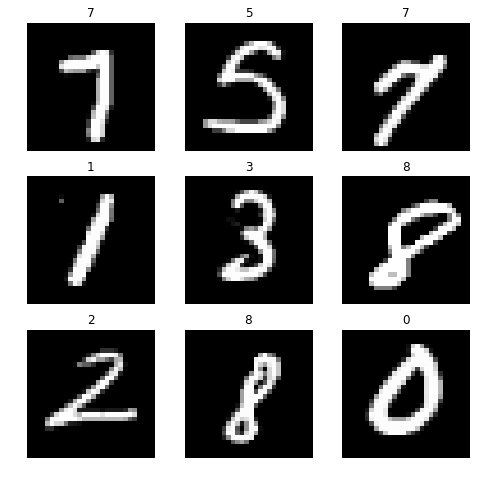

In [7]:
# 儲存增強的圖像數據　(Saving Augmented Images to File)
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# 載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖像數據集的維度進行改變 
# 改變前: [樣本數, 圖像寬, 圖像高] -> 改變後: [樣本數, 圖像寬, 圖像高, 圖像頻道數]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 將像素值由"整數(0~255)"換成"浮點數(0.0~255.0)"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 定義"圖像數據增強產生器(ImageDataGenerator)"的參數
datagen = ImageDataGenerator()

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# 產生要保存圖像檔案的目錄
if not os.path.exists('images'):
    os.makedirs('images')
    
# 設定要"圖像數據增強產生器(ImageDataGenerator)"產生的圖像批次值(batch size)
# "圖像數據增強產生器(ImageDataGenerator)"會根據設定回傳指定批次量的新生成圖像數據
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    plt.figure(figsize=(8,8)) # 設定每個圖像顯示的大小
    # 產生一個3x3網格的組合圖像
    for i in range(0, 9):
        plt.subplot(331+i)
        plt.title(y_batch[i]) # 秀出圖像的真實值
        plt.axis('off')     #不顯示坐標
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break # 跳出迴圈

運行範例，您可以看到只有在圖像生成時才會也把寫入圖像寫到檔案系統中。

## 用Keras增強圖像數據的技巧

圖像數據很獨特，因為您可以查看數據和數據的轉換副本，並快速了解模型如何通過您的圖像感知到某種影像特徵。


以下是從圖像數據準備和增強深度學習中獲得最多的一些時間。

* **查看圖像數據集** 花一些時間仔細檢查你的數據集。看圖像。注意可能有利於模型訓練過程的圖像準備和增強，例如需要處理場景中不同的輪班，旋轉或翻轉對象。
* **查看增強過的圖像** 增強操作完成後，查看一些範例圖像。理智地知道你正在使用什麼樣的圖像變換是一回事，真正看到範例圖像是非常不同的事情。查看您正在使用的單個增強圖像以及您計劃使用的全套增強圖像。您可能會看到簡化或進一步增強您的模型訓練的方法。
* **評估一整套變換** 嘗試多個圖像數據準備和增強方案。通常情況下，您認為這樣做不會有好處的轉換, 最後您可能會對數據增強後對模型的結果感到驚訝。

## 總結
在這篇文章中，您瞭解了圖像數據準備和增強的一些面向。

您發現了一系列可以輕鬆使用Keras來使用圖像數據增強(data augmentation)應用在深度學習模型的技術。您了解到：
* Keras中的ImageDataGenerator API可以用來動態產生新的轉換後的圖像來用於訓練。
* 圖像像素的標準化手法。
* ZCA白化轉換。
* 對圖像進行隨機旋轉，移動和翻轉。
* 如何將轉換後的圖像保存到檔案系統中以備後用。